# Mamoas Detection
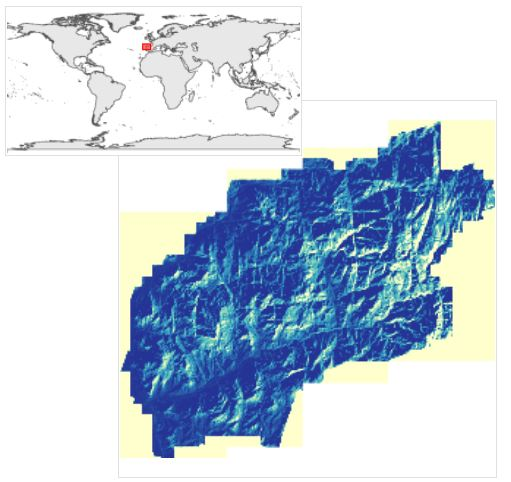

In [ ]:
!python -m pip show tensorflow

In [1]:
# Import relevant libraries
from tensorflow.keras.layers import Input, Activation, ZeroPadding2D, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob
import os.path
from pathlib import Path
import shutil
from os.path import exists
import seaborn as sns
import random
import ee
from PIL import Image

## Image Pre-Processing

In [2]:
# read all images of classes and convert .tif to .jpg format
path = "C:\\Users\\fabri\\Downloads\\folder data\\dataset_cnn\\"

data = []
width = 80
height = 80
dim = (width, height)

labels = ['mamoa', 'not_mamoa']
        
if(os.path.exists(path)):  
    for label in labels:
        p = os.path.join(path, label)
        class_num = labels.index(label)
        for img in os.listdir(p):
          img_array = cv2.imread(os.path.join(p,img), cv2.IMREAD_GRAYSCALE)
          resized = cv2.resize(img_array, dim, interpolation = cv2.INTER_AREA)
          data.append([resized, class_num])
else:
    print("This directory: "+path+" doesn't exist.")
# shuffle the dataset
random.shuffle(data)

# extract the features and label
x = []
y = []
for features, label in data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, height, width, 1)
y = np.array(y)

# Normalize the values of features
x = x/255

C:\Users\fabri\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

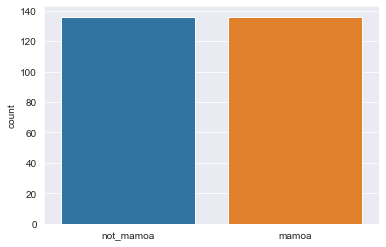

In [3]:
count = []
for i in range(0, len(data)):
    if (data[i][1] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')

sns.set_style('darkgrid')
sns.countplot(count)

# examples of two classes
#plt.figure(figsize = (5,5))
#plt.imshow(x[2], cmap='gray')
#if y[2] == 0: plt.title('mamoa')
#else: plt.title('not mamoa')

#plt.figure(figsize = (5,5))
#plt.imshow(x[10], cmap='gray')
#if y[10] == 0: plt.title('mamoa')
#else: plt.title('not mamoa')
 

## Train-Test-Val split

train, val, test: (190, 80, 80, 1) (41, 80, 80, 1) (41, 80, 80, 1)


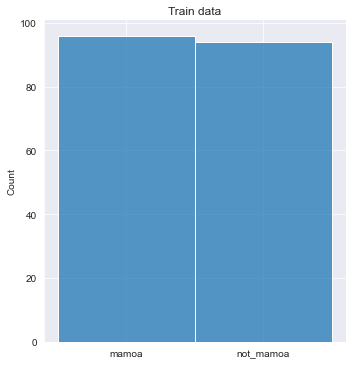

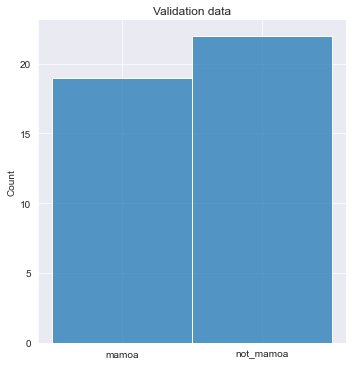

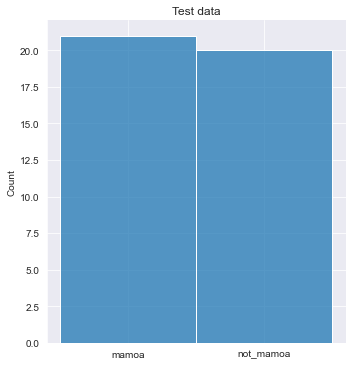

In [13]:
# split the dataset in train, validation and test using 60, 20, 20, respectively  change: 70, 15, 15
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=None)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5, random_state=None)

print("train, val, test:",x_train.shape,x_val.shape,x_test.shape)

count = []
for i in range(0, len(y_train)):
    if (y_train[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Train data") 

count = []
for i in range(0, len(y_val)):
    if (y_val[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Validation data") 

count = []
for i in range(0, len(y_test)):
    if (y_test[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Test data") 

## Model Building

In [15]:
def MamoasModel(input_shape):
    """
    Implementation of the model.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    
    Returns:
    model -- a Model() instance in Keras
    """
    # Use the suggested model in the text above to get started, and run through the whole
    # exercise once. Then come back and add more BLOCKS. 
    

    # BLOCK 1: CONV -> BN -> RELU -> MAXP
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool0')(X)

    # BLOCK 2: CONV -> BN -> RELU -> MAXP
    X = ZeroPadding2D((3, 3))(X)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
        
    # BLOCK N3: CONV -> BN -> RELU -> MAXP
    X = ZeroPadding2D((3, 3))(X)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
        
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model.
    model = Model(inputs = X_input, outputs = X, name='Model')
    
    return model

In [16]:
model = MamoasModel((height, width, 1))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ["accuracy"])
model.summary()

# plots the model in a nice layout and save it as ".png"
plot_model(model, to_file='model.png')

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 86, 86, 1)        0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 80, 80, 32)        1600      
                                                                 
 bn0 (BatchNormalization)    (None, 80, 80, 32)        128       
                                                                 
 activation (Activation)     (None, 80, 80, 32)        0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 40, 40, 32)        0         
                                                             

## Model Evaluation

In [17]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50) # patience 20, epoch 200

history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=300,callbacks=[early_stop],shuffle=True)

Epoch 1/300
6/6 [==============================] - 4s 548ms/step - loss: 0.7085 - accuracy: 0.7211 - val_loss: 0.8492 - val_accuracy: 0.5366
Epoch 2/300
6/6 [==============================] - 3s 528ms/step - loss: 0.1987 - accuracy: 0.9158 - val_loss: 0.9464 - val_accuracy: 0.5366
Epoch 3/300
6/6 [==============================] - 3s 486ms/step - loss: 0.1303 - accuracy: 0.9368 - val_loss: 0.9473 - val_accuracy: 0.5366
Epoch 4/300
6/6 [==============================] - 3s 504ms/step - loss: 0.0728 - accuracy: 0.9895 - val_loss: 0.7414 - val_accuracy: 0.5610
Epoch 5/300
6/6 [==============================] - 3s 471ms/step - loss: 0.0657 - accuracy: 0.9842 - val_loss: 0.5016 - val_accuracy: 0.7317
Epoch 6/300
6/6 [==============================] - 3s 543ms/step - loss: 0.0591 - accuracy: 0.9789 - val_loss: 0.4272 - val_accuracy: 0.8780
Epoch 7/300
6/6 [==============================] - 4s 626ms/step - loss: 0.0445 - accuracy: 0.9947 - val_loss: 0.4867 - val_accuracy: 0.7317
Epoch 8/300
6

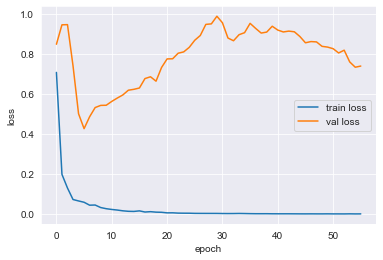

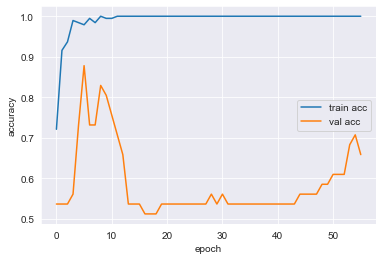

In [18]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('loss-graph.png')
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('acc-graph.png')
plt.show()

In [19]:
#Test the model on train data  
preds = model.evaluate(x = x_train, y = y_train)

print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))
print()

#Test the model on validation data  
preds = model.evaluate(x = x_val, y = y_val)

print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))
print()

#Test the model on test data  
preds = model.evaluate(x = x_test, y = y_test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print()

6/6 [==============================] - 1s 112ms/step - loss: 0.2950 - accuracy: 0.8579
Loss = 0.29503998160362244
Train Accuracy = 0.8578947186470032

2/2 [==============================] - 0s 38ms/step - loss: 0.7402 - accuracy: 0.6585
Loss = 0.7401850819587708
Validation Accuracy = 0.6585366129875183

2/2 [==============================] - 0s 41ms/step - loss: 0.4552 - accuracy: 0.7805
Loss = 0.45518818497657776
Test Accuracy = 0.7804877758026123



              precision    recall  f1-score   support

       mamoa       0.65      0.58      0.61        19
   not_mamoa       0.67      0.73      0.70        22

    accuracy                           0.66        41
   macro avg       0.66      0.65      0.65        41
weighted avg       0.66      0.66      0.66        41



<AxesSubplot:>

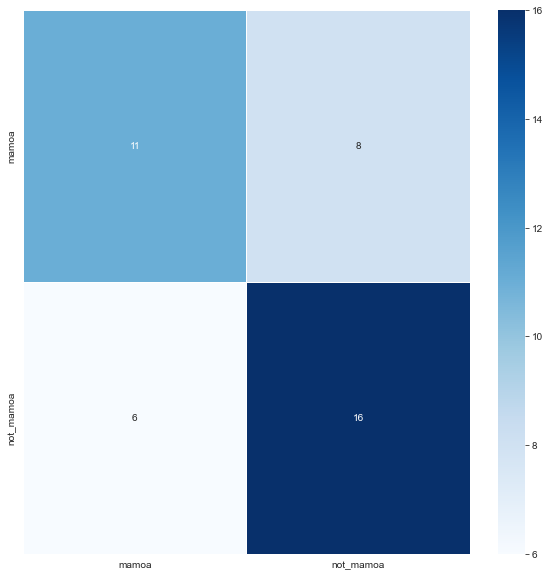

In [20]:
y_val_pred = model.predict(x_val)
#y_val_pred=np.argmax(y_val_pred, axis=1)
predict = []
for i in y_val_pred:
    if i[0] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_val_pred = np.array(predict)

target_names = ['mamoa', 'not_mamoa']
print(classification_report(y_val, y_val_pred, target_names = target_names))

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", linewidth = 1 , annot = True, fmt='g',xticklabels = labels,yticklabels = labels)

              precision    recall  f1-score   support

       mamoa       0.77      0.81      0.79        21
   not mamoa       0.79      0.75      0.77        20

    accuracy                           0.78        41
   macro avg       0.78      0.78      0.78        41
weighted avg       0.78      0.78      0.78        41



<AxesSubplot:>

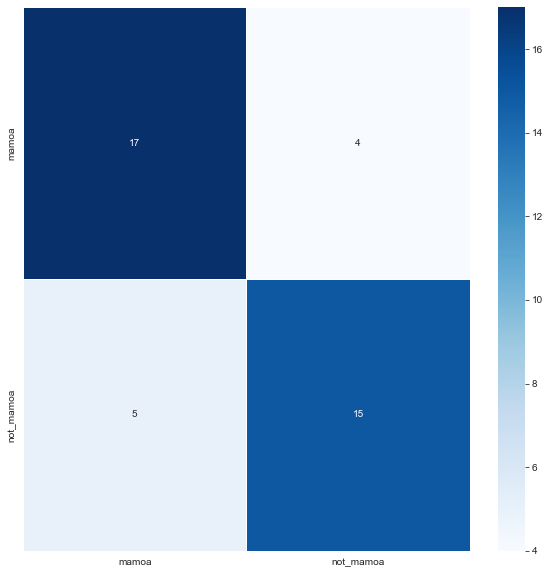

In [21]:
y_test_pred = model.predict(x_test)

#y_test_pred=np.argmax(y_test_pred, axis=1)
predict = []
for i in y_test_pred:
    if i[0] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_test_pred = np.array(predict)

target_names = ['mamoa', 'not mamoa']
print(classification_report(y_test, y_test_pred, target_names = target_names))

conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", linewidth = 1 , annot = True, fmt='g',xticklabels = labels,yticklabels = labels)

# Predict in LRM - Local Relief Model

In [37]:
# Authentication of google earth engine to access some files as example the local relief model
ee.Authenticate()
# Initialization of google earth engine
ee.Initialize()

Enter verification code: 4/1AX4XfWhmBkCtSUPmxwsZG24l1PdEyca5xAovQPr9uylg1CQZQDUGIyveF3o

Successfully saved authorization token.


In [38]:
LRM = ee.Image('users/fabriziobotelho/tiff_files')
geometry = LRM.geometry()
lrm_info = LRM.getInfo()
print(lrm_info) #debug

#geo-coordinates of upper left and lower right corners of LRM image
upper_left = [-8.907277129492169,42.16335245423417]
lower_right = [-8.06051504207768,41.59280385023923]

points = ee.Geometry.MultiPoint([upper_left, lower_right])

{'type': 'Image', 'bands': [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}, {'id': 'b2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}, {'id': 'b3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}, {'id': 'b4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}], 'version': 1644944174622534, 'id': 'users/fabriziobotelho/tiff_files', 'properties': {'system:footprint': {'type': 'LinearRing', 'coordinates': [[-8.900443739793436, 41.59280407757193], [-8.90044

In [40]:
#this function gets the dimention in pixel of LRM image
def getDimentionsImage(img):
  imgDescription = ee.Algorithms.Describe(img)
  w = ee.List(ee.Dictionary(ee.List(ee.Dictionary(imgDescription).get("bands")).get(0)).get("dimensions")).get(0)
  w = w.getInfo()
  h = ee.List(ee.Dictionary(ee.List(ee.Dictionary(imgDescription).get("bands")).get(0)).get("dimensions")).get(1)
  h = h.getInfo()

  return w, h

#this function uses the equations before obtained to convert a geo-coordinate to pixel coordinate
def convert_GeoCoord_to_PixelCoord(geocoordinate, m1, m2, b1, b2):
  x_geo = geocoordinate[0]
  y_geo = geocoordinate[1]
  x = round(x_geo * m1 + b1)
  y = round(y_geo * m2 + b2)
  
  return x, y

#this function is the inverse of the previous function, with it we can get the geo-coordinates that corresponds to the pixel coordinates
def convert_PixelCoord_to_GeoCoord(pixelcoordinate, m1, m2, b1, b2):
  x = pixelcoordinate[0]
  y = pixelcoordinate[1]
  x_geo = (x - b1)/m1
  y_geo = (y - b2)/m2
  
  return x_geo, y_geo

In [41]:
width, height = getDimentionsImage(LRM)
width, height

(69977, 63086)

In [42]:
x_geo1 = upper_left[0]
y_geo1 = upper_left[1]
x_geo2 = lower_right[0]
y_geo2 = lower_right[1]

x1 = 0;
y1 = 0;
x2 = width - 1 
y2 = height - 1

#equations to convert geo-coordinates to pixel coordinates
#x = x_geo * m1 + b1
#y = y_geo * m2 + b2

m1 = (x1 - x2)/(x_geo1 - x_geo2)
b1 = x1 - x_geo1 * m1
print('m1:', m1, 'b1:', b1)

m2 = (y1 - y2)/(y_geo1 - y_geo2)
b2 = y1 - y_geo1 * m2
print('m2:', m2, 'b2:', b2)

m1: 82639.5052873298 b1: 736092.9754383798
m2: -110569.01998932785 b2: 4661960.560329294


In [29]:
geometria = ee.Geometry.Polygon([[[-8.465536005299885,41.94138068664731],
                            [-8.187444574635823,41.94138068664731],
                            [-8.187444574635823,42.06282255531614],
                            [-8.465536005299885,42.06282255531614],
                            [-8.465536005299885,41.94138068664731]]])

LRM = LRM.clip(geometria)

width, height = getDimentionsImage(LRM)
width, height

(23071, 13542)

In [44]:
dim = 80 # pixels
scale = 0.5 # m/px corresponds to dim * scale = 40 meters on terrain
per = 50 # percentage of slide 
slide = dim * per/100
w=80
h=80
dims = (w,h)

countObj = 0

# create a polygon
x11 = 0
x12 = 0
x21 = dim
x22 = 0
x31 = dim
x32 = dim
x41 = 0
x42 = dim

rows = round((height + 1) / dim)
rows = rows + rows-1
columns = round((width + 1) / dim)
columns = columns + columns-1

for i in range(rows):
    #print("#####################", i, "#########################")
    for j in range(columns):
        #print(j)
        x1 = convert_PixelCoord_to_GeoCoord([x11, x12], m1, m2, b1, b2)
        x2 = convert_PixelCoord_to_GeoCoord([x21, x22], m1, m2, b1, b2)
        x3 = convert_PixelCoord_to_GeoCoord([x31, x32], m1, m2, b1, b2)
        x4 = convert_PixelCoord_to_GeoCoord([x41, x42], m1, m2, b1, b2)
        
        block = ee.Geometry.Polygon([[x1[0], x1[1]], [x2[0], x2[1]], [x3[0], x3[1]], [x4[0], x4[1]]])
        img = LRM.clipToBoundsAndScale(block, None, None, None, scale)
        img = img.unmask()

        band_arrs = img.sampleRectangle(block)
        band_arrs = band_arrs.get('b1')
            
        # Transfer the arrays from server to client and cast as np array.
        np_arr_b1 = np.array(band_arrs.getInfo())
        #print(np_arr_b1)
        
        array = np.array(np_arr_b1, dtype='uint8')
        resized = cv2.resize(array, dims, interpolation = cv2.INTER_AREA)
        
        array = np.array(resized).reshape(-1, h, w, 1)
        array = array/255 # normalization
        a_mean= np.mean(array)
        if (a_mean != 0):
            pred = model.predict(array)
            #pred=np.argmax(pred, axis=1)
            if (pred[0] < 0.5):
                countObj+=1
                print(countObj)
                #plt.imshow(array, cmap='gray')
                im = Image.fromarray(resized)
                im.save("C:\\Users\\fabri\\Downloads\\folder data\\scan\\"+str(j)+"_"+str(i)+".jpg")
            
        x11 = x21
        x12 = x22
        x21 = x21 + slide
        x22 = x22
        x41 = x31
        x42 = x42 
        x31 = x31 + slide
        x32 = x32
    
    x11 = 0
    x21 = 0
    x41 = 0
    x31 = 0

    x12 = x12 + slide
    x22 = x22 + slide
    x42 = x42 + slide
    x32 = x32 + slide
    j = 0


print("Detected: ", countObj, " mamoas.")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

[[[[0.52156866]
   [0.52156866]
   [0.48235294]
   ...
   [0.45882353]
   [0.45882353]
   [0.4627451 ]]

  [[0.57254905]
   [0.57254905]
   [0.53333336]
   ...
   [0.4862745 ]
   [0.4862745 ]
   [0.47843137]]

  [[0.57254905]
   [0.57254905]
   [0.53333336]
   ...
   [0.4862745 ]
   [0.4862745 ]
   [0.48235294]]

  ...

  [[0.42745098]
   [0.42745098]
   [0.39215687]
   ...
   [0.6431373 ]
   [0.6431373 ]
   [0.5372549 ]]

  [[0.48235294]
   [0.48235294]
   [0.47058824]
   ...
   [0.6117647 ]
   [0.6117647 ]
   [0.5372549 ]]

  [[0.48235294]
   [0.48235294]
   [0.4745098 ]
   ...
   [0.6117647 ]
   [0.6117647 ]
   [0.5372549 ]]]]
[[2.694522e-05]]


[[[[0.50980392]
   [0.50980392]
   [0.50980392]
   ...
   [0.56078431]
   [0.56078431]
   [0.56078431]]

  [[0.50980392]
   [0.50980392]
   [0.50980392]
   ...
   [0.56078431]
   [0.56078431]
   [0.56078431]]

  [[0.50980392]
   [0.50980392]
   [0.50980392]
   ...
   [0.56078431]
   [0.56078431]
   [0.56078431]]

  ...

  [[0.6       ]
   [0.6       ]
   [0.6       ]
   ...
   [0.76078431]
   [0.76078431]
   [0.76078431]]

  [[0.6       ]
   [0.6       ]
   [0.6       ]
   ...
   [0.76078431]
   [0.76078431]
   [0.76078431]]

  [[0.6       ]
   [0.6       ]
   [0.6       ]
   ...
   [0.76078431]
   [0.76078431]
   [0.76078431]]]]


TypeError: Invalid shape (1, 80, 80, 1) for image data

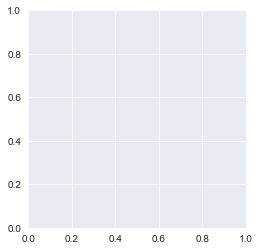

In [88]:
block = ee.Geometry.Polygon([[[-8.72759140238686,41.98194181666798],
[-8.727296359395222,41.98194181666798],
[-8.727296359395222,41.98216911348768],
[-8.72759140238686,41.98216911348768],
[-8.72759140238686,41.98194181666798]]])

img = LRM.clipToBoundsAndScale(block, None, None, None, scale)
img = img.unmask()
band_arrs = img.sampleRectangle(block)
band_arrs = band_arrs.get('b1')

# Transfer the arrays from server to client and cast as np array.
np_arr_b1 = np.array(band_arrs.getInfo())
width = 80
height = 80
dim = (width, height)
array = np.array(np_arr_b1, dtype='uint8')
resized = cv2.resize(array, dim, interpolation = cv2.INTER_AREA)

array = np.array(resized).reshape(-1, height, width, 1)
#plt.imshow(resized, cmap='gray')

array = array / 255
print(array)
plt.imshow(array, cmap='gray')
array = np.mean(array)
print(array)


In [ ]:
block = ee.Geometry.Polygon([[[-8.453929515117297,41.89035172527825],
                            [-8.453387708896289,41.89035172527825],
[-8.453387708896289,41.890794991306734],
[-8.453929515117297,41.890794991306734],
[-8.453929515117297,41.89035172527825]]])